In [37]:
import pandas as pd
from sklearn import * 
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [5]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,...,property_unknown/none,installment_plan_none,installment_plan_stores,housing_own,housing_rent,telephone_yes,foreign_worker_yes,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,6,1169,4,4,67,2,1,1,1,0,...,0,1,0,1,0,1,1,1,0,0
1,48,5951,2,2,22,1,2,1,0,0,...,0,1,0,1,0,0,1,1,0,0
2,12,2096,2,3,49,1,1,2,0,0,...,0,1,0,1,0,0,1,0,0,1
3,42,7882,2,4,45,1,1,2,1,0,...,0,1,0,0,0,0,1,1,0,0
4,24,4870,3,4,53,2,2,2,1,0,...,1,1,0,0,0,0,1,1,0,0


In [12]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df_dummy.default)
X = df_dummy.copy()
del X["default"]
X.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,property_unknown/none,installment_plan_none,installment_plan_stores,housing_own,housing_rent,telephone_yes,foreign_worker_yes,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,1,0,1,1,1,0,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,0,1,0,0,1,0,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,0,1,1,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,1,1,0,0,0,0,1,1,0,0


In [14]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression(C=1.0))
])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.75666666666666671

(<matplotlib.figure.Figure at 0x1a0c250160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0c22b128>)

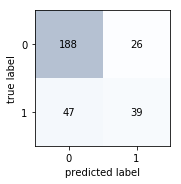

In [19]:
y_test_pred = pipe.predict(X_test)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [20]:
(188 + 39) / len(y_test)

0.7566666666666667

In [24]:
pd.DataFrame(pipe.predict_proba(X_test)).head()

,0,1
0,0.609428,0.390572
1,0.062964,0.937036
2,0.793430,0.206570
3,0.384815,0.615185
4,0.157366,0.842634


In [25]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]

(<matplotlib.figure.Figure at 0x1a11ef32e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a11e1b2b0>)

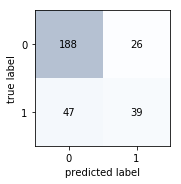

In [32]:
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<matplotlib.figure.Figure at 0x1a0c2eec50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a11dede80>)

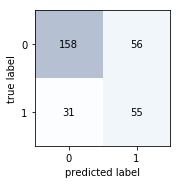

In [33]:
y_test_pred = np.where(y_test_prob > 0.3, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<matplotlib.figure.Figure at 0x108376668>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a11f55518>)

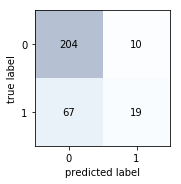

In [34]:
y_test_pred = np.where(y_test_prob > 0.7, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Text(0.5,1,'ROC cuver, auc: 0.75847641817')

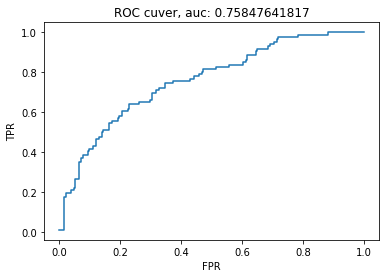

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot([0, 0], [1, 1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC cuver, auc: " + str(metrics.auc(fpr, tpr)))

In [41]:
pd.Series(y).value_counts()

0    700
1    300
dtype: int64

In [51]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  